In [7]:
# Campo em Copacabana - dia 21/09/2024
# Sensores: Boia e RBR
# Objetivo: Processamento dos dados de ondas com a boia (conversao de acc p heave)

In [8]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import ipympl
import numpy as np
from scipy.stats import norm
from importlib import reload
sys.path.append('../ocean-wave')
import waveproc
reload(waveproc);

In [18]:
pth = '/mnt/c/Users/henri/OneDrive - atmosmarine.com/boia_oceanpact/dados/teste_copacabana_20240921/RBR/'
fln = '055161_20240921_1904.xlsx'

df = pd.read_excel(pth + fln, sheet_name='Bursts', header=1)
df.index = pd.to_datetime(df.Time, format="%Y-%m-%d %H:%M:%S.%f")
df.index.name = 'time'
df.Wave = df.Wave.astype('float16')

h = df.loc[df.Burst == 7].Wave.values
t = np.arange(0, len(h)*0.5, 0.5)

/mnt/c/Users/henri/git/venv/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [10]:
# # %matplotlib widget
# %matplotlib inline

# df.Wave.plot(ylabel='Heave [m]', grid='on')

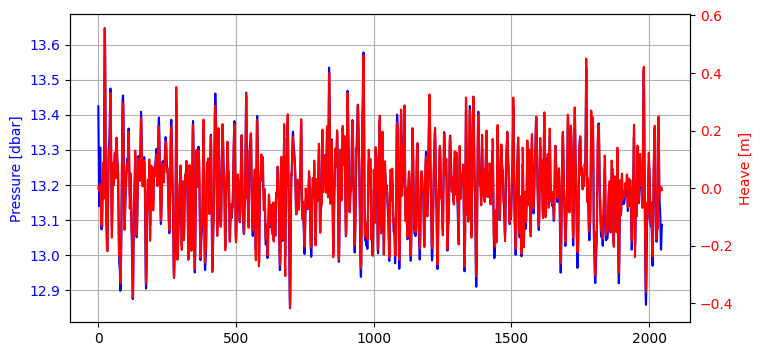

In [11]:
# %matplotlib widget
%matplotlib inline
# plt.close('all')

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df.loc[df.Burst == 7].Pressure.values, color='b')
ax.tick_params(axis='y', labelcolor='b')
ax.set_ylabel('Pressure [dbar]', color='b')
ax.grid()

ax1 = ax.twinx()
ax1.plot(df.loc[df.Burst == 7].Wave.values, color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_ylabel('Heave [m]', color='red')

plt.show()
# plt.xlim(0, 200)

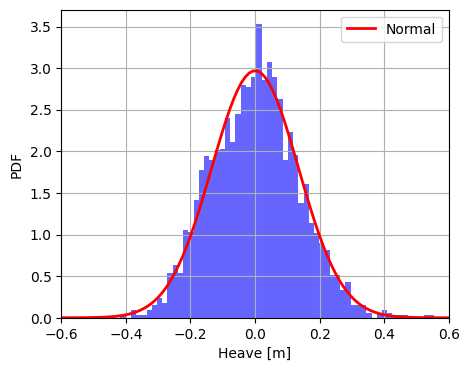

In [46]:

# Plotar o histograma
fig, ax = plt.subplots(figsize=(5, 4))
ax.hist(h, bins=60, density=True, alpha=0.6, color='b')  # 'density=True' normaliza o histograma
ax.set_xlim(-0.6, 0.6)
ax.grid()

# Calcular média e desvio padrão dos dados
mu, std = np.mean(h), np.std(h)

# Gerar a curva normal
x = np.linspace(-0.6, 0.6, 100)
p = norm.pdf(x, mu, std)

# Plotar a curva normal sobre o histograma
ax.plot(x, p, 'r', linewidth=2, label='Normal')
ax.set_xlabel('Heave [m]')
ax.set_ylabel('PDF')

ax.legend();

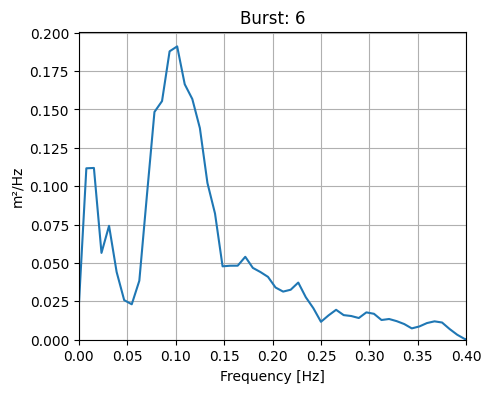

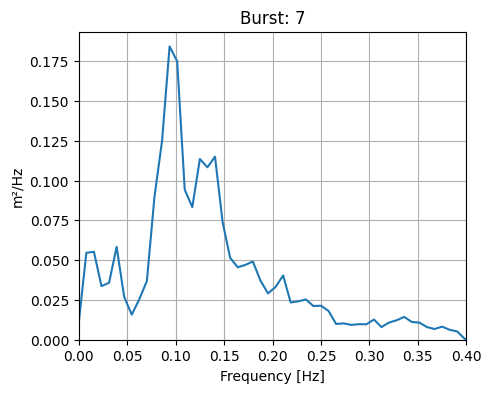

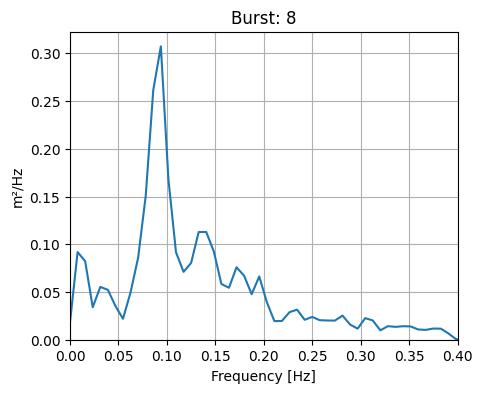

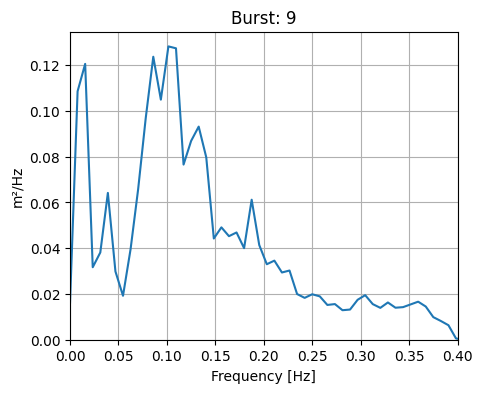

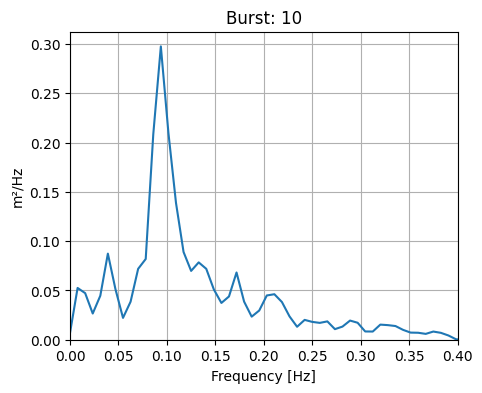

In [47]:
t = np.arange(0, len(h)*0.5, 0.5)

bb = [6, 7, 8, 9, 10]

for b in bb:

    h = df.loc[df.Burst == b].Wave.values

    cc, pp, tt = waveproc.waveproc(t=t, s1=h, s2=[], s3=[], Fs=2.0, NFFT=128*2)

    fig, ax = plt.subplots(figsize=(5, 4))
    ax.plot(cc.c11)
    ax.set_title(f'Burst: {b}')
    ax.set_xlim(0, 0.4)
    ax.set_ylim(bottom=0)
    ax.set_ylabel('m²/Hz')
    ax.set_xlabel('Frequency [Hz]')
    ax.grid()
